In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
#Load and prepare the dataset
df = pd.read_csv('europe-kopi.csv')
features = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']
X = df[features]

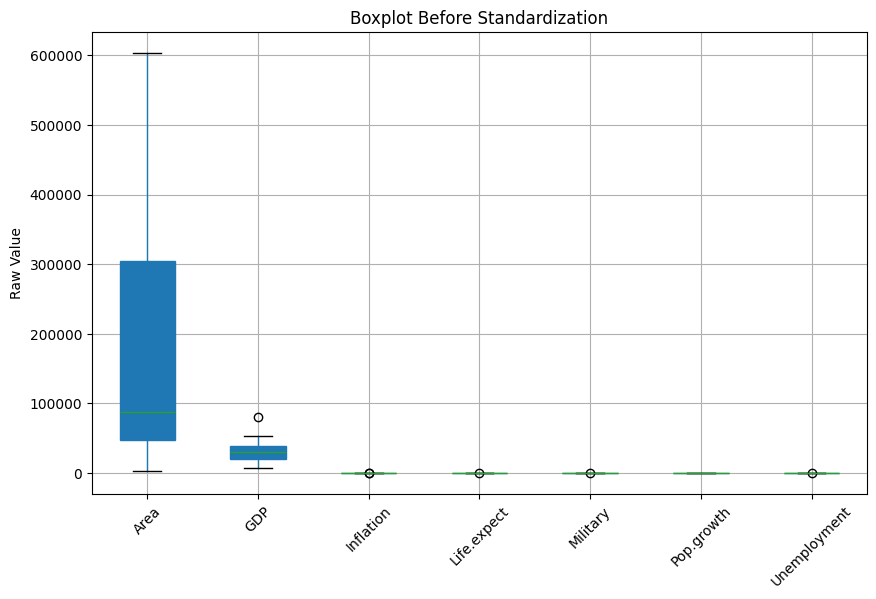

In [7]:
#Boxplot before standardization
plt.figure(figsize=(10,6))
X.boxplot(rot=45, patch_artist=True)
plt.title("Boxplot Before Standardization")
plt.ylabel("Raw Value")
plt.grid(True)
plt.show()

###  Boxplot Before Standardization
This plot illustrates the raw distribution of the dataset’s features before standardization. It highlights a strong imbalance between variables, particularly the extreme scale of "Area" compared to others. If left unstandardized, this would cause PCA to prioritize these large-scale variables and distort the analysis. Therefore, this plot justifies the need to standardize all features prior to PCA.

In [8]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

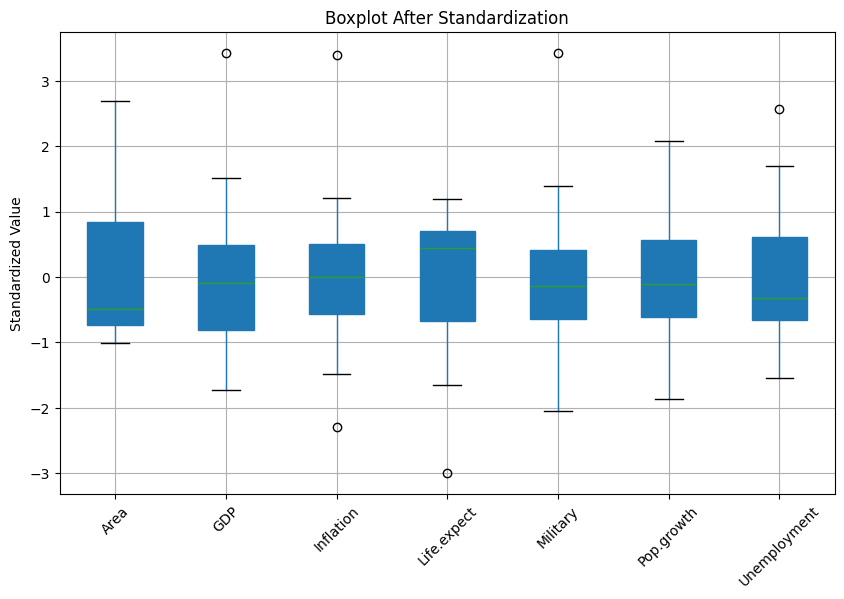

In [9]:
# Boxplot after standardization
plt.figure(figsize=(10,6))
pd.DataFrame(X_scaled, columns=features).boxplot(rot=45, patch_artist=True)
plt.title("Boxplot After Standardization")
plt.ylabel("Standardized Value")
plt.grid(True)
plt.show()

### Boxplot After Standardization

After applying standardization, all variables have been rescaled to have a mean of zero and a standard deviation of one. This ensures that each variable contributes equally to the PCA, allowing the principal components to reflect true structure in the data rather than just differences in magnitude.

In [10]:
#PCA computation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))], index=features)

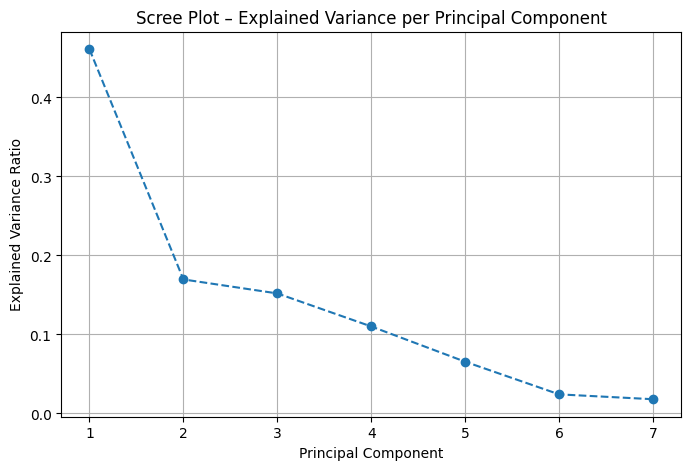

In [11]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title('Scree Plot – Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

### Scree Plot – Explained Variance per Principal Component

The scree plot shows the amount of variance captured by each principal component. The first component (PC1) alone accounts for approximately 46% of the total variance, while PC1 and PC2 together explain over 60%. This confirms that the first two components retain most of the information in the dataset and are suitable for interpretation and visualization.


In [12]:
# Print explained variance and PC1 loadings
print("Explained variance (PC1):", round(explained_var[0], 3))
print("\nPC1 Loadings:")
print(loadings['PC1'].sort_values(ascending=False))

Explained variance (PC1): 0.461

PC1 Loadings:
GDP             0.500506
Life.expect     0.482873
Pop.growth      0.475704
Area           -0.124874
Military       -0.188112
Unemployment   -0.271656
Inflation      -0.406518
Name: PC1, dtype: float64


### PC1 Loadings and Country Scores

The loadings show how much each variable contributes to PC1. GDP, life expectancy, and population growth have the strongest positive influence, while inflation and unemployment contribute negatively. The bar plot below ranks countries based on their PC1 scores, reflecting a gradient of socioeconomic development—from highly developed (e.g. Luxembourg, Switzerland) to less developed countries (e.g. Ukraine, Bulgaria).

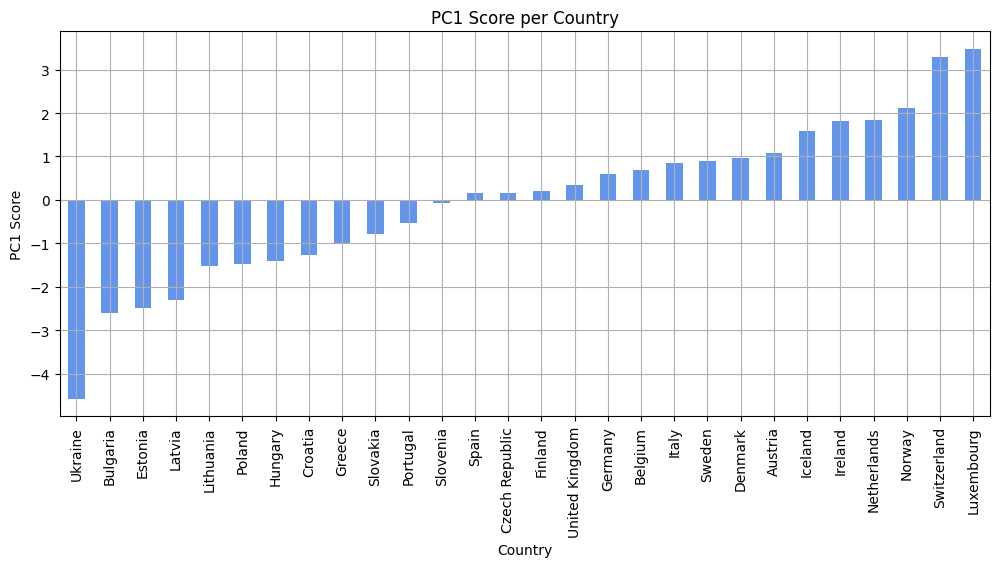

In [13]:
# Bar plot: PC1 score per country
pc1_values = pd.Series(X_pca[:, 0], index=df["Country"])
pc1_values.sort_values().plot(kind='bar', figsize=(12,5), title="PC1 Score per Country", color='cornflowerblue')
plt.ylabel("PC1 Score")
plt.grid(True)
plt.show()

###  PC1 Score per Country

This bar plot shows each country's score on the first principal component. Countries with low PC1 scores (e.g., Luxembourg, Switzerland, Norway) exhibit strong economic and social indicators such as high GDP and life expectancy. In contrast, countries with high PC1 scores (e.g., Ukraine, Bulgaria, Estonia) tend to have higher unemployment and inflation. PC1 can therefore be interpreted as a "socioeconomic development axis."


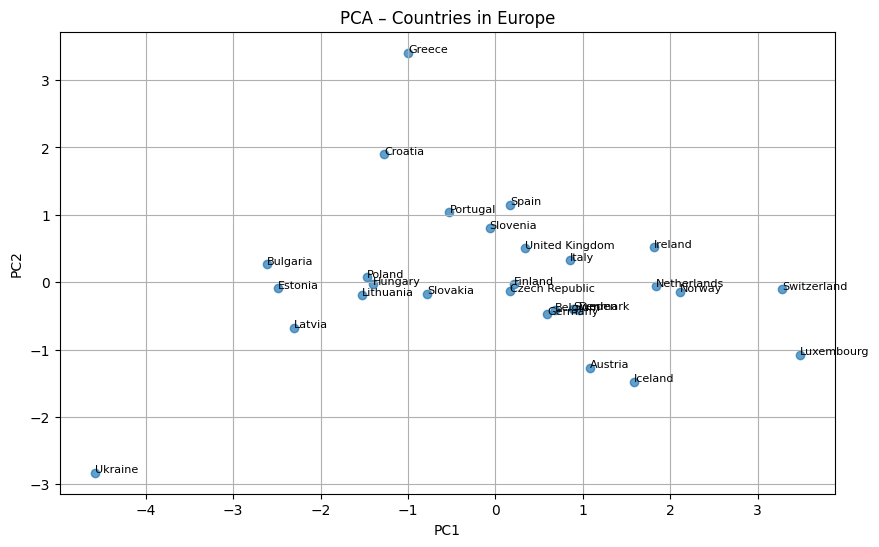

In [14]:
# PCA scatter plot (PC1 vs PC2)
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for i, country in enumerate(df['Country']):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA – Countries in Europe')
plt.grid(True)
plt.show()


###  PCA – Countries in Europe

The scatter plot maps countries based on their PC1 and PC2 scores. It provides a visual clustering where countries with similar profiles are placed near each other. Western European countries cluster on the left (lower PC1), while Eastern and Southern European countries spread to the right and top, indicating lower development or other differentiating factors captured by PC2.

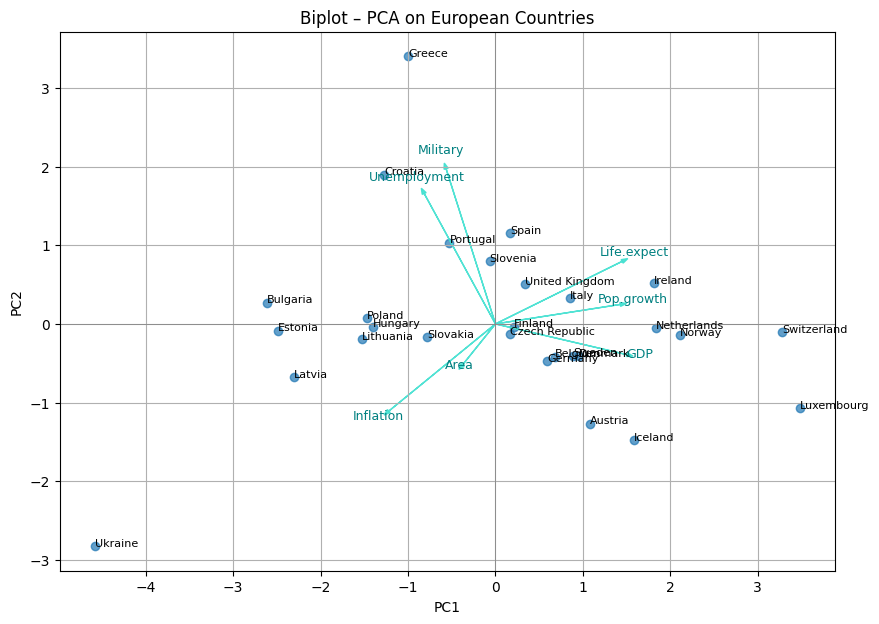

In [15]:
# Biplot: Countries and variable loadings
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for i, country in enumerate(df['Country']):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=8)
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings['PC1'][var]*3, loadings['PC2'][var]*3,
              color='turquoise', alpha=0.9, head_width=0.05)
    plt.text(loadings['PC1'][var]*3.3, loadings['PC2'][var]*3.3,
             var, color='teal', fontsize=9, ha='center')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot – PCA on European Countries")
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

### Biplot – PCA on European Countries

The biplot combines the scores of countries and the direction of variable influence. It shows that variables like GDP, life expectancy, and population growth are aligned with negative PC1 values, while inflation and unemployment point in the opposite direction. This visual confirms that PC1 captures a development gradient, and helps explain which features drive a country’s position in the PCA space.

### Final Summary

The PCA revealed that most variation in the dataset can be explained by a single underlying dimension, represented by PC1. This component reflects a socioeconomic development gradient: countries with low PC1 scores tend to have high GDP, life expectancy, and population growth, while those with high PC1 scores show higher inflation and unemployment. Western and Northern European countries cluster toward the "developed" end, whereas Eastern and Southern countries appear on the opposite side. PCA thus uncovered clear structural differences across European countries based on their economic and social indicators.